### 使用自己封装的SGD调用随机数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 创建数据
m = 100000
x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

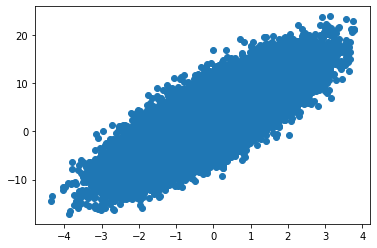

In [3]:
plt.scatter(x, y)

In [4]:
from pycharm_knn.LinearRegression import LinearRegression

In [5]:
lin_reg = LinearRegression()

In [6]:
lin_reg.fit_sgd(X,y,n_iters=2)

LinearRegression()

In [8]:
lin_reg.coef_

array([4.00967224])

In [9]:
lin_reg.intercept_

3.033888479499063

### 使用自己封装的SGD 调用真实的数据  

In [2]:
import numpy as np
from sklearn import datasets

In [3]:
#使用波士顿房产数据集
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [4]:
from pycharm_knn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [6]:
#将数据进行归一化处理
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

In [9]:
from pycharm_knn.LinearRegression import LinearRegression
lin_reg = LinearRegression()
%timeit lin_reg.fit_sgd(X_train_standard,y_train,n_iters=2)

5.08 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
lin_reg.score(X_test_standard,y_test)

0.7673018867762866

In [11]:
# 增加 n_iters=2 循环的次数，看预测结果的变化 
lin_reg2 = LinearRegression()
%timeit lin_reg2.fit_sgd(X_train_standard,y_train,n_iters=100)

250 ms ± 8.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
lin_reg2.score(X_test_standard,y_test)

0.7943078505145629

### 使用 skliearn 中的 SGD

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_standard,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [16]:
sgd_reg.score(X_test_standard,y_test)

0.8114496027576344

In [21]:
# 更改 n_iter 的循环的次数查看预测结果
sgd_reg2 = SGDRegressor(n_iter_no_change= 100)
sgd_reg2.fit(X_train_standard,y_train)
sgd_reg2.score(X_test_standard,y_test)

0.8131282583634535